In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

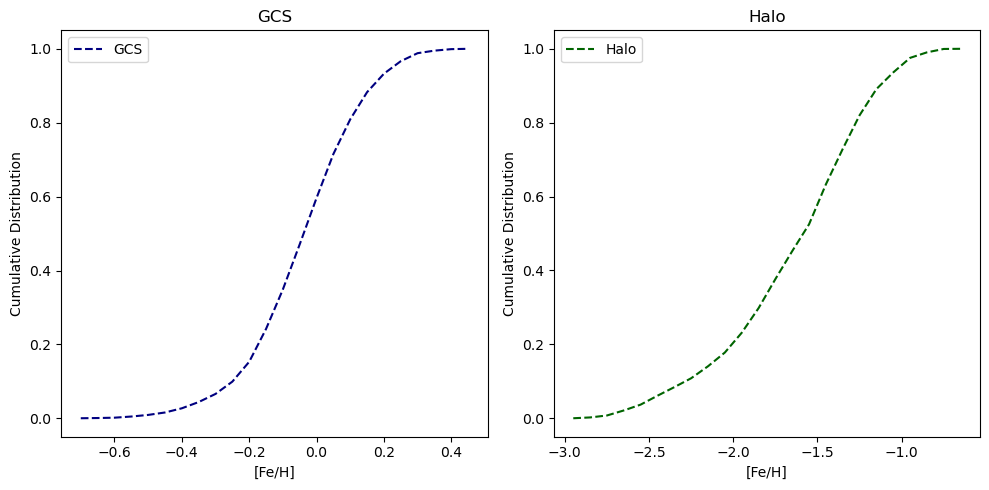

In [2]:
# (a)
data = pd.read_csv('/Users/sehalee/Downloads/abundanceTable.txt', sep='\t')

fe_h_gcs = data.iloc[:, 0]
fractions_gcs = data.iloc[:, 1]
fe_h_halo = data.iloc[:, 2]
fractions_halo = data.iloc[:, 3]

cumulative_gcs = np.cumsum(fractions_gcs)
cumulative_gcs_normalized = cumulative_gcs / cumulative_gcs.iloc[-1]
cumulative_halo = np.cumsum(fractions_halo)
cumulative_halo_normalized = cumulative_halo / cumulative_halo.iloc[-1]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(fe_h_gcs, cumulative_gcs_normalized, label='GCS', color='navy',linestyle='--')
ax[0].set_xlabel('[Fe/H]')
ax[0].set_ylabel('Cumulative Distribution')
ax[0].title.set_text('GCS')
ax[0].legend()

ax[1].plot(fe_h_halo, cumulative_halo_normalized, label='Halo', color='darkgreen',linestyle='--')
ax[1].set_xlabel('[Fe/H]')
ax[1].set_ylabel('Cumulative Distribution')
ax[1].title.set_text('Halo')
ax[1].legend()

plt.tight_layout()
plt.show()

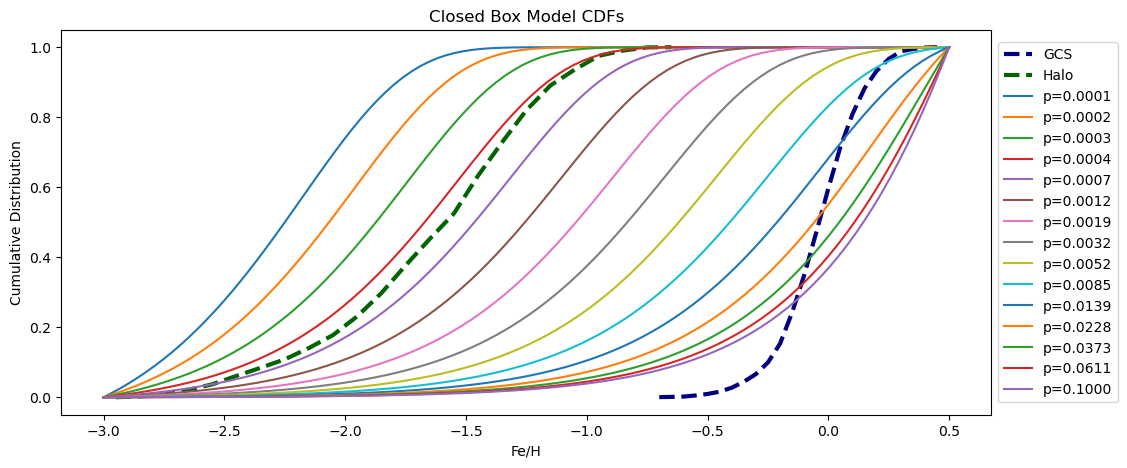

In [3]:
# (b) again but in fe_h


def closed_box_cdf(fe_h_,p,Z0=0): # (12.37)
    # log10(Z/Z_sun) = [Fe/H], Z_sun = 0.015
    Z = 0.015 * 10 ** fe_h_
    return 1 - np.exp((Z0-Z) / p)

plt.figure(figsize=(12,5))
plt.plot(fe_h_gcs, cumulative_gcs_normalized, label='GCS', color='navy', linestyle='--',linewidth=3)
plt.plot(fe_h_halo, cumulative_halo_normalized, label='Halo', color='darkgreen', linestyle='--',linewidth=3)

p_value = np.logspace(-4, -1, 15)
FeH = np.linspace(-3, 0.5, 100)

for p in p_value:
    closed_box_norm = (closed_box_cdf(FeH, p)-closed_box_cdf(FeH[0],p))/(closed_box_cdf(FeH[-1],p)-closed_box_cdf(FeH[0],p))
    plt.plot(FeH, closed_box_norm, label=f'p={p:.4f}')

    
plt.xlabel('Fe/H')
plt.ylabel('Cumulative Distribution')
plt.title('Closed Box Model CDFs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_82894/1705182993.py:3: RuntimeWarning: invalid value encountered in log
  return -np.log(1-(Z /p))


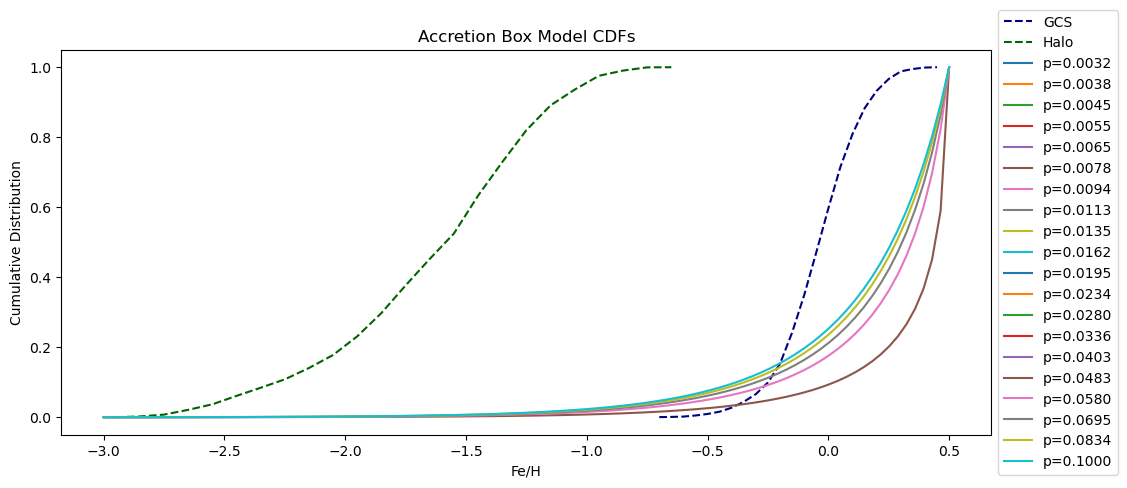

In [6]:
def accretion_cdf(fe_h_,p): # (12.53)
    Z = 0.015 * 10 ** fe_h_
    return -np.log(1-(Z /p))

p_gcs = np.logspace(-3, -1, 10)
p_halo = np.logspace(-4, -1, 10)
FeH = np.linspace(-3, 0.5, 500)

plt.figure(figsize=(12,5))
plt.plot(fe_h_gcs, cumulative_gcs_normalized, label='GCS', color='navy', linestyle='--')
plt.plot(fe_h_halo, cumulative_halo_normalized, label='Halo', color='darkgreen', linestyle='--')

p_value = np.logspace(-2.5, -1, 20)
FeH = np.linspace(-3, 0.5, 100)

for p in p_value:
    accretion_cdf_norm = (accretion_cdf(FeH, p)-accretion_cdf(FeH[0],p))/(accretion_cdf(FeH[-1],p)-accretion_cdf(FeH[0],p))
    plt.plot(FeH, accretion_cdf_norm, label=f'p={p:.4f}')

    
plt.xlabel('Fe/H')
plt.ylabel('Cumulative Distribution')
plt.title('Accretion Box Model CDFs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
